<a href="https://colab.research.google.com/github/marziyeh-sa/Detecting_Parkinson_disease_with_Machine_learning/blob/main/final_project_ML_UT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS

if you want to use google colab and load data from google drive run this row!!

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
PATH_TO_DATA = '/content/drive/MyDrive/Colab Notebooks/ML_UT/pd_speech_features.csv'
data = pd.read_csv(PATH_TO_DATA)
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [ ]:
is_all_zero = np. all((data.isnull().sum() == 0))
is_all_zero

True

In [ ]:
y = data['class']
x = data.drop("class", axis=1)
x.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_33,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,0.00129,0.00200,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,69.997496,76.088046,72.465512,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,0.77778,11.7245,2.8277,1.17300,0.26512,0.083127,...,-0.173620,0.071728,0.010352,-2.73030,66.5007,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2.1550,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,0.00112,0.00157,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,67.415903,73.046374,71.528945,564.363614,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,0.81250,13.8284,2.8908,1.02210,0.22004,0.127410,...,0.684220,0.729330,0.780410,5.22940,8643.9860,3962.0554,2976.2411,4329.0607,4005.1329,1127.6762,116.5331,20.2332,13.6395,12.5514,13.6965,60.8974,6.2958,3.0323,3.4039,4.3794,2.4329,2.0585,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,0.00111,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,62.661706,71.633549,68.086583,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,0.81818,26.9273,2.6975,0.84951,0.15756,0.116890,...,-0.060885,0.269510,-0.005522,0.35054,29.2717,32.4971,38.9453,85.1480,62.5132,9.7308,6.8890,6.1357,5.4926,3.9078,4.0864,6.9828,3.4411,3.5173,3.7204,4.2212,3.4881,3.4851,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,0.00268,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865,76.306989,81.000749,79.190593,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,0.98548,139.5744,1.6961,0.83405,0.17295,0.147370,...,-0.367170,0.366920,-0.492650,0.19164,591.0116,65.3827,53.9852,45.4458,34.6650,88.3259,46.6869,23.2911,19.2022,42.3957,100.3649,7.1967,6.3892,6.5496,6.0264,4.7656,4.8909,4.2531,3.0295,2.0362,1.8478,2.5776,2.2064,1.9491,1.9120,1.8829,6.9761,3.7805,3.5664,5.2558,1

In [ ]:
#normalization
x = MinMaxScaler(feature_range=(0, 1)).fit_transform(x)
x.shape

(756, 754)

In [ ]:
#PCA with whitening
pca_w = PCA(whiten=True, n_components=350).fit(x)
x_pca_w =  pca_w.transform(x)
x_pca_w.shape

(756, 350)

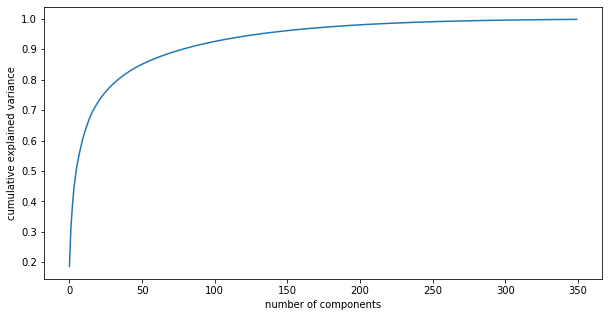

In [ ]:
f, ax = plt.subplots(figsize=(10,5))
plt.plot(np.cumsum(pca_w.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
#LDA after PCA
lda = LDA()
x_pca_w_lda = lda.fit_transform(x_pca_w, y)
x_pca_w_lda.shape

(756, 1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_w_lda,y,test_size=0.3,random_state=42)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def result(test, label, model, flag_mlp):
    
    if flag_mlp:
        predicted = np.argmax(model.predict(test), axis=1)
    else:
        predicted= model.predict(test) 
        
    print('F1 score: ', f1_score(label, predicted, average='macro'))
    conf_mat = confusion_matrix(label, predicted)
    print('Confusion Matrix:')
    plot_confusion_matrix(conf_mat, ['Healthy', 'Sick'])


## KNN

### with PCA and LDA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_w_lda,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
result(x_test, y_test, knn_model, False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

F1 score:  0.9373636021572808
Confusion Matrix:


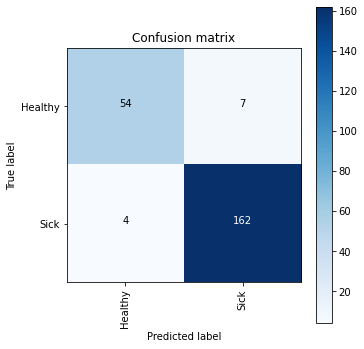

In [ ]:
result(x_test, y_test, knn_model, False)

### with PCA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_w,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

F1 score:  0.43959842001316657
Confusion Matrix:


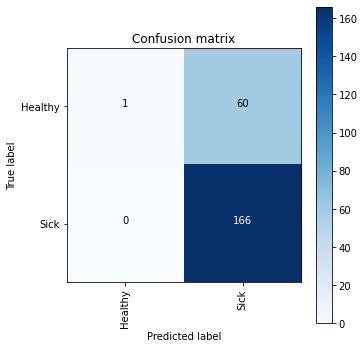

In [ ]:
result(x_test, y_test, knn_model, False)

### Real Data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

F1 score:  0.737065637065637
Confusion Matrix:


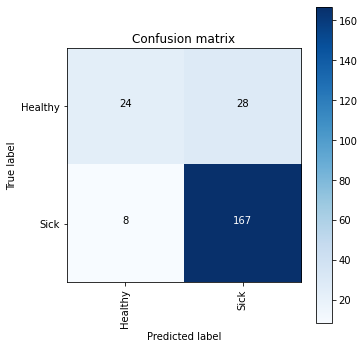

In [ ]:
result(x_test, y_test, knn_model, False)

## Decision Tree

### with PCA and LDA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_w_lda,y,test_size=0.3,random_state=42)

F1 score:  0.9259751661858774
Confusion Matrix:


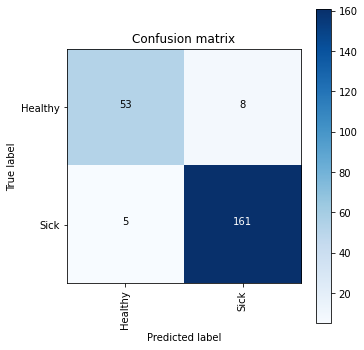

In [ ]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(x_train, y_train)
result(x_test, y_test, tree_model, False)

### with PCA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_w,y,test_size=0.3,random_state=42)

F1 score:  0.5947255662109774
Confusion Matrix:


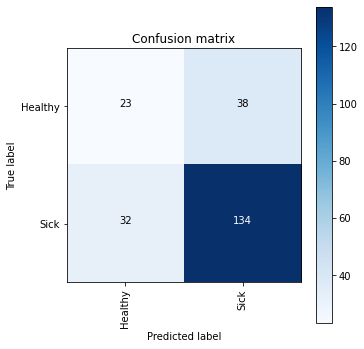

In [ ]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(x_train, y_train)
result(x_test, y_test, tree_model, False)

### Real Data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

F1 score:  0.6800691397420555
Confusion Matrix:


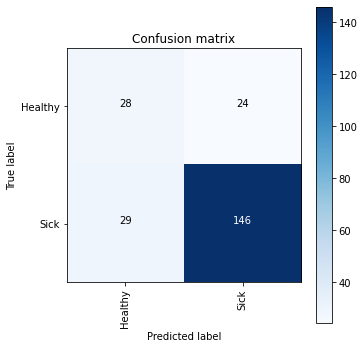

In [ ]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(x_train, y_train)
result(x_test, y_test, tree_model, False)

## SVM

### with PCA and LDA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_w_lda,y,test_size=0.3,random_state=42)

F1 score:  0.9546906187624751
Confusion Matrix:


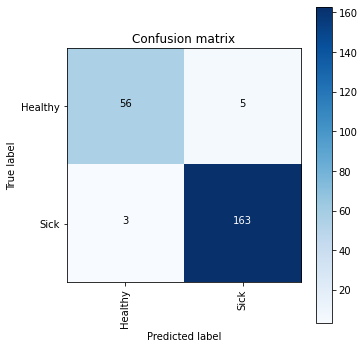

In [ ]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear', decision_function_shape='ovr')
svm_model = svm_model.fit(x_train, y_train)
result(x_test, y_test, svm_model, False)

### with PCA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_w,y,test_size=0.3,random_state=42)

F1 score:  0.820031712473573
Confusion Matrix:


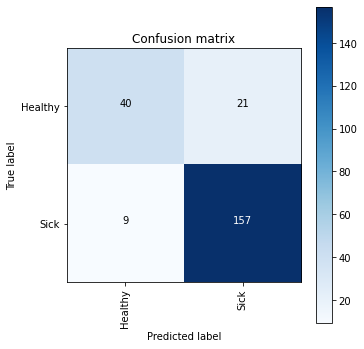

In [ ]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear', decision_function_shape='ovr')
svm_model = svm_model.fit(x_train, y_train)
result(x_test, y_test, svm_model, False)

### Real Data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

F1 score:  0.7644078144078144
Confusion Matrix:


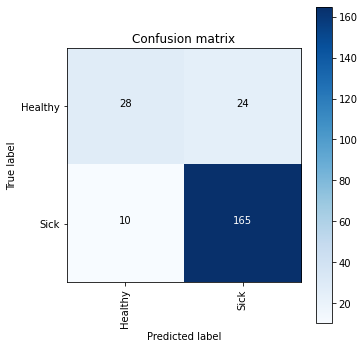

In [ ]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear', decision_function_shape='ovr')
svm_model = svm_model.fit(x_train, y_train)
result(x_test, y_test, svm_model, False)

## Bayes Classifier with Parzen Estimation

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KernelDensity


class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]


### with PCA and LDA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_w_lda,y,test_size=0.3,random_state=42)

F1 score:  0.9592407336154931
Confusion Matrix:


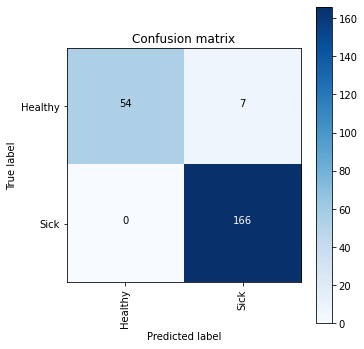

In [ ]:
parzen_kde_model = KDEClassifier()
parzen_kde_model = parzen_kde_model.fit(x_train, y_train)
result(x_test, y_test, parzen_kde_model, False)

### with PCA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_w,y,test_size=0.3,random_state=42)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


F1 score:  0.5849638422704325
Confusion Matrix:


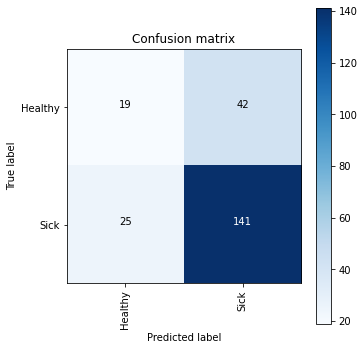

In [ ]:
parzen_kde_model = KDEClassifier()
parzen_kde_model = parzen_kde_model.fit(x_train, y_train)
result(x_test, y_test, parzen_kde_model, False)

### Real Data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

F1 score:  0.6911337476556466
Confusion Matrix:


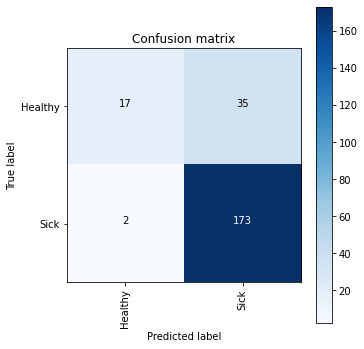

In [ ]:
parzen_kde_model = KDEClassifier()
parzen_kde_model = parzen_kde_model.fit(x_train, y_train)
result(x_test, y_test, parzen_kde_model, False)

## MLP

### with PCA and LDA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_w_lda,y,test_size=0.3,random_state=42)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_ = to_categorical(y_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

input_shape = x_train[0].shape

model = Sequential()
model.add(Dense(100, input_shape=input_shape, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train_, epochs=20, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/20
2/2 [==============================] - 0s 173ms/step - loss: 0.8122 - accuracy: 0.7495 - val_loss: 0.7478 - val_accuracy: 0.7830
Epoch 2/20
2/2 [==============================] - 0s 36ms/step - loss: 0.7659 - accuracy: 0.7442 - val_loss: 0.7051 - val_accuracy: 0.7547
Epoch 3/20
2/2 [==============================] - 0s 48ms/step - loss: 0.7215 - accuracy: 0.7363 - val_loss: 0.6646 - val_accuracy: 0.7547
Epoch 4/20
2/2 [==============================] - 0s 41ms/step - loss: 0.6788 - accuracy: 0.7194 - val_loss: 0.6264 - val_accuracy: 0.7642
Epoch 5/20
2/2 [==============================] - 0s 38ms/step - loss: 0.6389 - accuracy: 0.7032 - val_loss: 0.5907 - val_accuracy: 0.7170
Epoch 6/20
2/2 [==============================] - 0s 45ms/step - loss: 0.6017 - accuracy: 0.6824 - val_loss: 0.5575 - val_accuracy: 0.7264
Epoch 7/20
2/2 [==============================] - 0s 45ms/step - loss: 0.5617 - accuracy: 0.6988 - val_loss: 0.5268 - val_accuracy: 0.9057
Epoch 8/20
2/2 [==========

F1 score:  0.9118647938791824
Confusion Matrix:


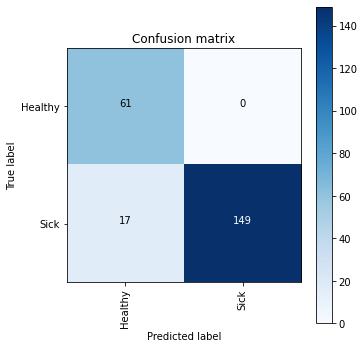

In [ ]:
result(x_test , y_test , model, True)

### with PCA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_w,y,test_size=0.3,random_state=42)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_ = to_categorical(y_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

input_shape = x_train[0].shape

model = Sequential()
model.add(Dense(500, input_shape=input_shape, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train_, epochs=40, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/40
2/2 [==============================] - 1s 195ms/step - loss: 0.8319 - accuracy: 0.4841 - val_loss: 0.7601 - val_accuracy: 0.5849
Epoch 2/40
2/2 [==============================] - 0s 43ms/step - loss: 0.4405 - accuracy: 0.8281 - val_loss: 0.6695 - val_accuracy: 0.6887
Epoch 3/40
2/2 [==============================] - 0s 44ms/step - loss: 0.2799 - accuracy: 0.8962 - val_loss: 0.6429 - val_accuracy: 0.6981
Epoch 4/40
2/2 [==============================] - 0s 44ms/step - loss: 0.1873 - accuracy: 0.9610 - val_loss: 0.6375 - val_accuracy: 0.7264
Epoch 5/40
2/2 [==============================] - 0s 42ms/step - loss: 0.1316 - accuracy: 0.9855 - val_loss: 0.6362 - val_accuracy: 0.7264
Epoch 6/40
2/2 [==============================] - 0s 44ms/step - loss: 0.0849 - accuracy: 1.0000 - val_loss: 0.6362 - val_accuracy: 0.7358
Epoch 7/40
2/2 [==============================] - 0s 47ms/step - loss: 0.0581 - accuracy: 1.0000 - val_loss: 0.6373 - val_accuracy: 0.7642
Epoch 8/40
2/2 [==========

F1 score:  0.5798070990160101
Confusion Matrix:


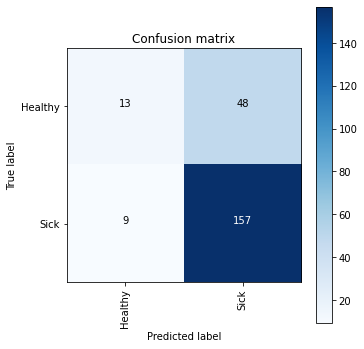

In [ ]:
result(x_test , y_test , model, True)

### Real Data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_ = to_categorical(y_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

input_shape = x_train[0].shape

model = Sequential()
model.add(Dense(800, input_shape=input_shape, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train_, epochs=100, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 1s 193ms/step - loss: 0.6630 - accuracy: 0.7391 - val_loss: 0.6415 - val_accuracy: 0.6226
Epoch 2/100
2/2 [==============================] - 0s 52ms/step - loss: 0.6058 - accuracy: 0.6655 - val_loss: 0.5120 - val_accuracy: 0.7358
Epoch 3/100
2/2 [==============================] - 0s 51ms/step - loss: 0.4427 - accuracy: 0.7841 - val_loss: 0.4503 - val_accuracy: 0.8585
Epoch 4/100
2/2 [==============================] - 0s 51ms/step - loss: 0.4150 - accuracy: 0.8314 - val_loss: 0.4456 - val_accuracy: 0.8491
Epoch 5/100
2/2 [==============================] - 0s 49ms/step - loss: 0.4052 - accuracy: 0.8353 - val_loss: 0.4498 - val_accuracy: 0.8113
Epoch 6/100
2/2 [==============================] - 0s 55ms/step - loss: 0.3952 - accuracy: 0.8395 - val_loss: 0.4271 - val_accuracy: 0.8774
Epoch 7/100
2/2 [==============================] - 0s 51ms/step - loss: 0.3803 - accuracy: 0.8522 - val_loss: 0.4241 - val_accuracy: 0.8585
Epoch 8/100
2/2 [==

F1 score:  0.7771576024457969
Confusion Matrix:


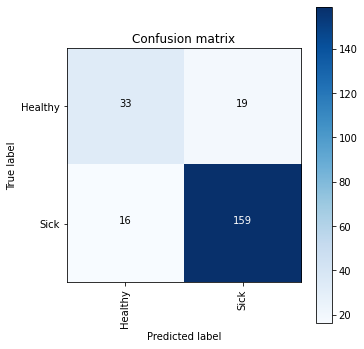

In [ ]:
result(x_test , y_test , model, True)

## GMM

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [ ]:
def GMM(num_components , x_train):
    model = mixture.GaussianMixture(n_components=num_components, covariance_type='full').fit(x_train)
    print('\u03BC = ', model.means_, sep="\n")
    print('\u03A3 = ', model.covariances_, sep="\n")
    print ('weight = ', model.weights_)

In [ ]:
def AIC_BIC(x_train):
    n_components = np.arange(1, 10)
    clfs = [mixture.GaussianMixture( n , max_iter = 1000).fit(x_train) for n in n_components]
    bics = [clf.bic(x_train) for clf in clfs]
    aics = [clf.aic(x_train) for clf in clfs]

    plt.plot(n_components, bics, label = 'BIC')
    plt.plot(n_components, aics, label = 'AIC')
    plt.xlabel('n_components')

    plt.legend()
    plt.show()

### with LDA and PCA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_w_lda,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(x_train)

print('\u03BC = ', model.means_, sep="\n")
print('\u03A3 = ', model.covariances_, sep="\n")
print ('weight = ', model.weights_)


μ = 
[[ 1.10350868]
 [-3.3622941 ]]
Σ = 
[[[0.90441359]]

 [[1.08936541]]]
weight =  [0.75246008 0.24753992]


F1 score:  0.03516739446870451
Confusion Matrix:


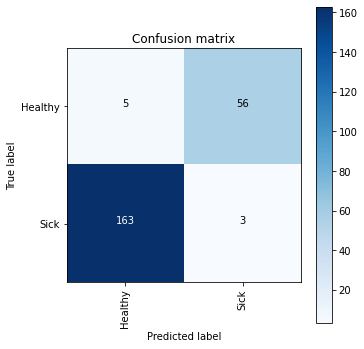

In [ ]:
result(x_test , y_test , model, False)

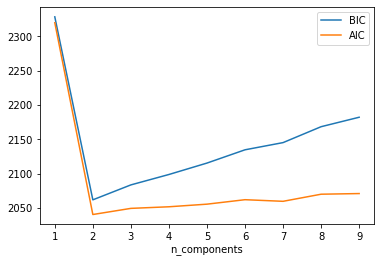

In [ ]:
 AIC_BIC(x_train)

### with PCA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_w,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(x_train)
labels = model.predict(x_test)

print('\u03BC = ', model.means_, sep="\n")
print('\u03A3 = ', model.covariances_, sep="\n")
print ('weight = ', model.weights_)


μ = 
[[-0.11788527  0.0086899  -0.04751188  0.07375582  0.08570141  0.02657687
   0.01568836  0.0288539   0.0354897  -0.03497345 -0.04054383 -0.05450146
  -0.06999296 -0.02849885  0.00824738  0.01179481  0.09116995 -0.01560058
   0.01573047  0.0408922  -0.02918956 -0.10588065  0.0479386   0.03017799
  -0.06302957 -0.03588153  0.05151826 -0.01476449 -0.0022462   0.06929234
   0.06916527  0.00123658 -0.02716075  0.09229036  0.01067245 -0.06734427
   0.0968618  -0.00690845  0.00108405  0.0487968   0.08767095 -0.07380746
   0.0181128  -0.03015522 -0.03526862 -0.1005209   0.03209011 -0.00325083
  -0.04226316 -0.02988796 -0.05917899  0.01592128  0.01566237 -0.09678653
   0.00939134 -0.05262456  0.03317003 -0.03007154  0.00152677  0.02931963
  -0.00299522 -0.0074736   0.0107889   0.03126253 -0.04558884  0.06108327
  -0.05922137  0.00481576  0.03839037 -0.05981841 -0.05504781 -0.04247588
  -0.02865142  0.01301841  0.0559807   0.04897947 -0.07840883 -0.02664048
   0.11537236  0.02286288 -0.0134

F1 score:  0.21180555555555552
Confusion Matrix:


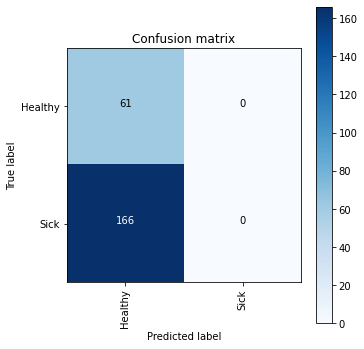

In [ ]:
result(x_test , y_test , model, False)

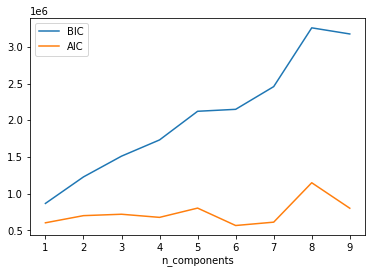

In [ ]:
 AIC_BIC(x_train)

### Real Data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(x_train)
labels = model.predict(x_test)

print('\u03BC = ', model.means_, sep="\n")
print('\u03A3 = ', model.covariances_, sep="\n")
print ('weight = ', model.weights_)

μ = 
[[0.49768017 0.44620253 0.81110268 ... 0.1537305  0.15168436 0.09164837]
 [0.51768513 0.56807512 0.80350531 ... 0.27081896 0.30845927 0.30471236]]
Σ = 
[[[ 0.09306984 -0.01466789  0.00553208 ... -0.00991917 -0.00960959
   -0.00763027]
  [-0.01466789  0.24710683 -0.0032277  ...  0.01069769  0.01062907
    0.00927271]
  [ 0.00553208 -0.0032277   0.04373895 ...  0.00171805 -0.00064681
    0.0008014 ]
  ...
  [-0.00991917  0.01069769  0.00171805 ...  0.05085637  0.04634104
    0.03054038]
  [-0.00960959  0.01062907 -0.00064681 ...  0.04634104  0.04746949
    0.03147434]
  [-0.00763027  0.00927271  0.0008014  ...  0.03054038  0.03147434
    0.02939151]]

 [[ 0.07746174 -0.00788611  0.00209695 ...  0.00354644  0.00316873
    0.00076757]
  [-0.00788611  0.24536678  0.00613046 ...  0.02543036  0.01433768
    0.00569344]
  [ 0.00209695  0.00613046  0.03981648 ...  0.00208217  0.00330537
    0.00188172]
  ...
  [ 0.00354644  0.02543036  0.00208217 ...  0.07820699  0.07230469
    0.0496101 ]

F1 score:  0.4747515992922281
Confusion Matrix:


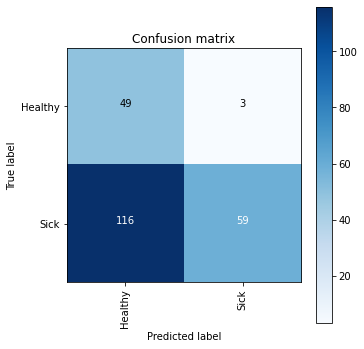

In [ ]:
result(x_test , y_test , model, False)

## Logestic Regression 

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
def plot_ROC(y_test, y_pred):
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim=([0.0, 1.0])
    plt.ylim=([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

### with PCA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_w,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42).fit(x_train, y_train)
y_pred = model.predict(x_test)

F1 score:  0.7574576222241474
Confusion Matrix:


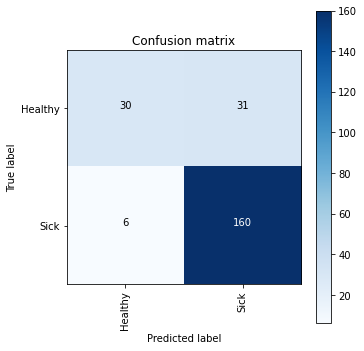

In [ ]:
result(x_test , y_test , model, False)

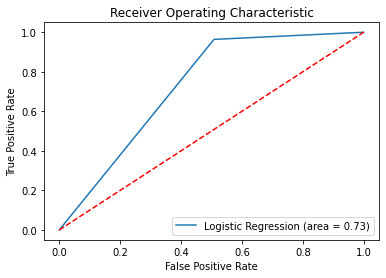

In [ ]:
plot_ROC(y_test, y_pred)

### with PCA and LDA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_w_lda,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=10).fit(x_train, y_train)
y_pred = model.predict(x_test)

F1 score:  0.9546906187624751
Confusion Matrix:


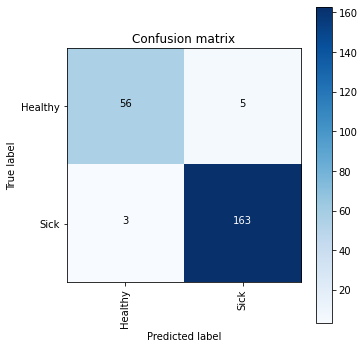

In [ ]:
result(x_test , y_test , model, False)

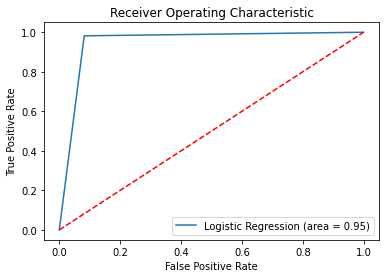

In [ ]:
plot_ROC(y_test, y_pred)

### Real Data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=10).fit(x_train, y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


F1 score:  0.6932432432432434
Confusion Matrix:


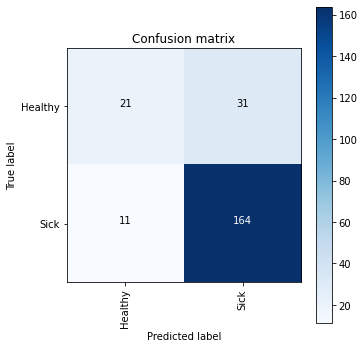

In [ ]:
result(x_test , y_test , model, False)

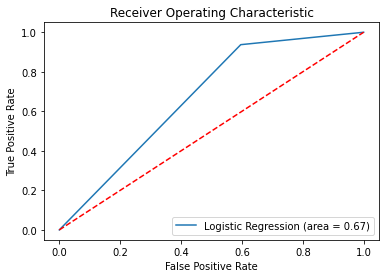

In [ ]:
plot_ROC(y_test, y_pred)

## RBF

### with PCA and LDA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_w_lda,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn import svm

model = svm.SVC(kernel='rbf',class_weight='balanced', degree=3).fit(x_train,y_train)


Accuracy of svm with RBF kernel: 0.9647577092511013
F1 score:  0.9556207233626588
Confusion Matrix:


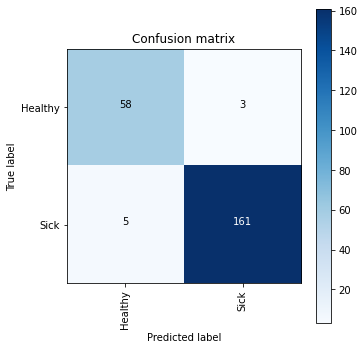

In [ ]:
scores = model.score(x_test,y_test)
print('Accuracy of svm with RBF kernel:',scores)
result(x_test , y_test , model, False)


### with PCA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_w,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn import svm

model = svm.SVC(kernel='rbf',class_weight='balanced', degree=3).fit(x_train,y_train)


Accuracy of svm with RBF kernel: 0.7797356828193832
F1 score:  0.5963726884779517
Confusion Matrix:


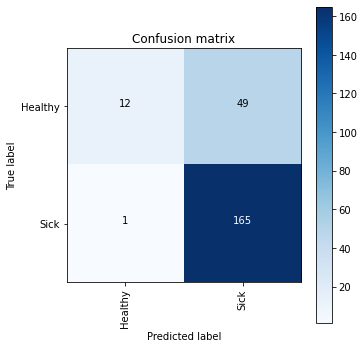

In [ ]:
scores = model.score(x_test,y_test)
print('Accuracy of svm with RBF kernel:',scores)
result(x_test , y_test , model, False)


### Real Data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
from sklearn import svm

model = svm.SVC(kernel='rbf',class_weight='balanced', degree=3).fit(x_train,y_train)


Accuracy of svm with RBF kernel: 0.8105726872246696
F1 score:  0.7336335107108747
Confusion Matrix:


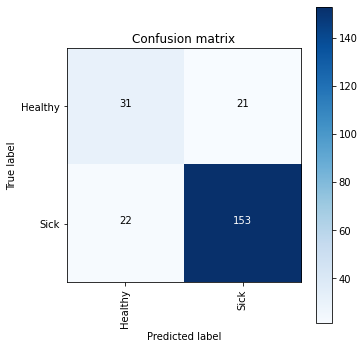

In [ ]:
scores = model.score(x_test,y_test)
print('Accuracy of svm with RBF kernel:',scores)
result(x_test , y_test , model, False)
